# Matplotlib vs. Seaborn

Reference: https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

This is a practice notebook to showcase Python's variety of packages for plotting data. The notebook will focus on the Matplotlib and Seaborn data visualization libraries

The dataset used is the Bike Sharing Dataset from the UCI Machine Learning Repository.

========================================= Dataset characteristics =========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

$\textbf{MATPLOTLIB}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
bikes = pd.read_csv('day.csv')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


$\textit{Scatter Plot}$

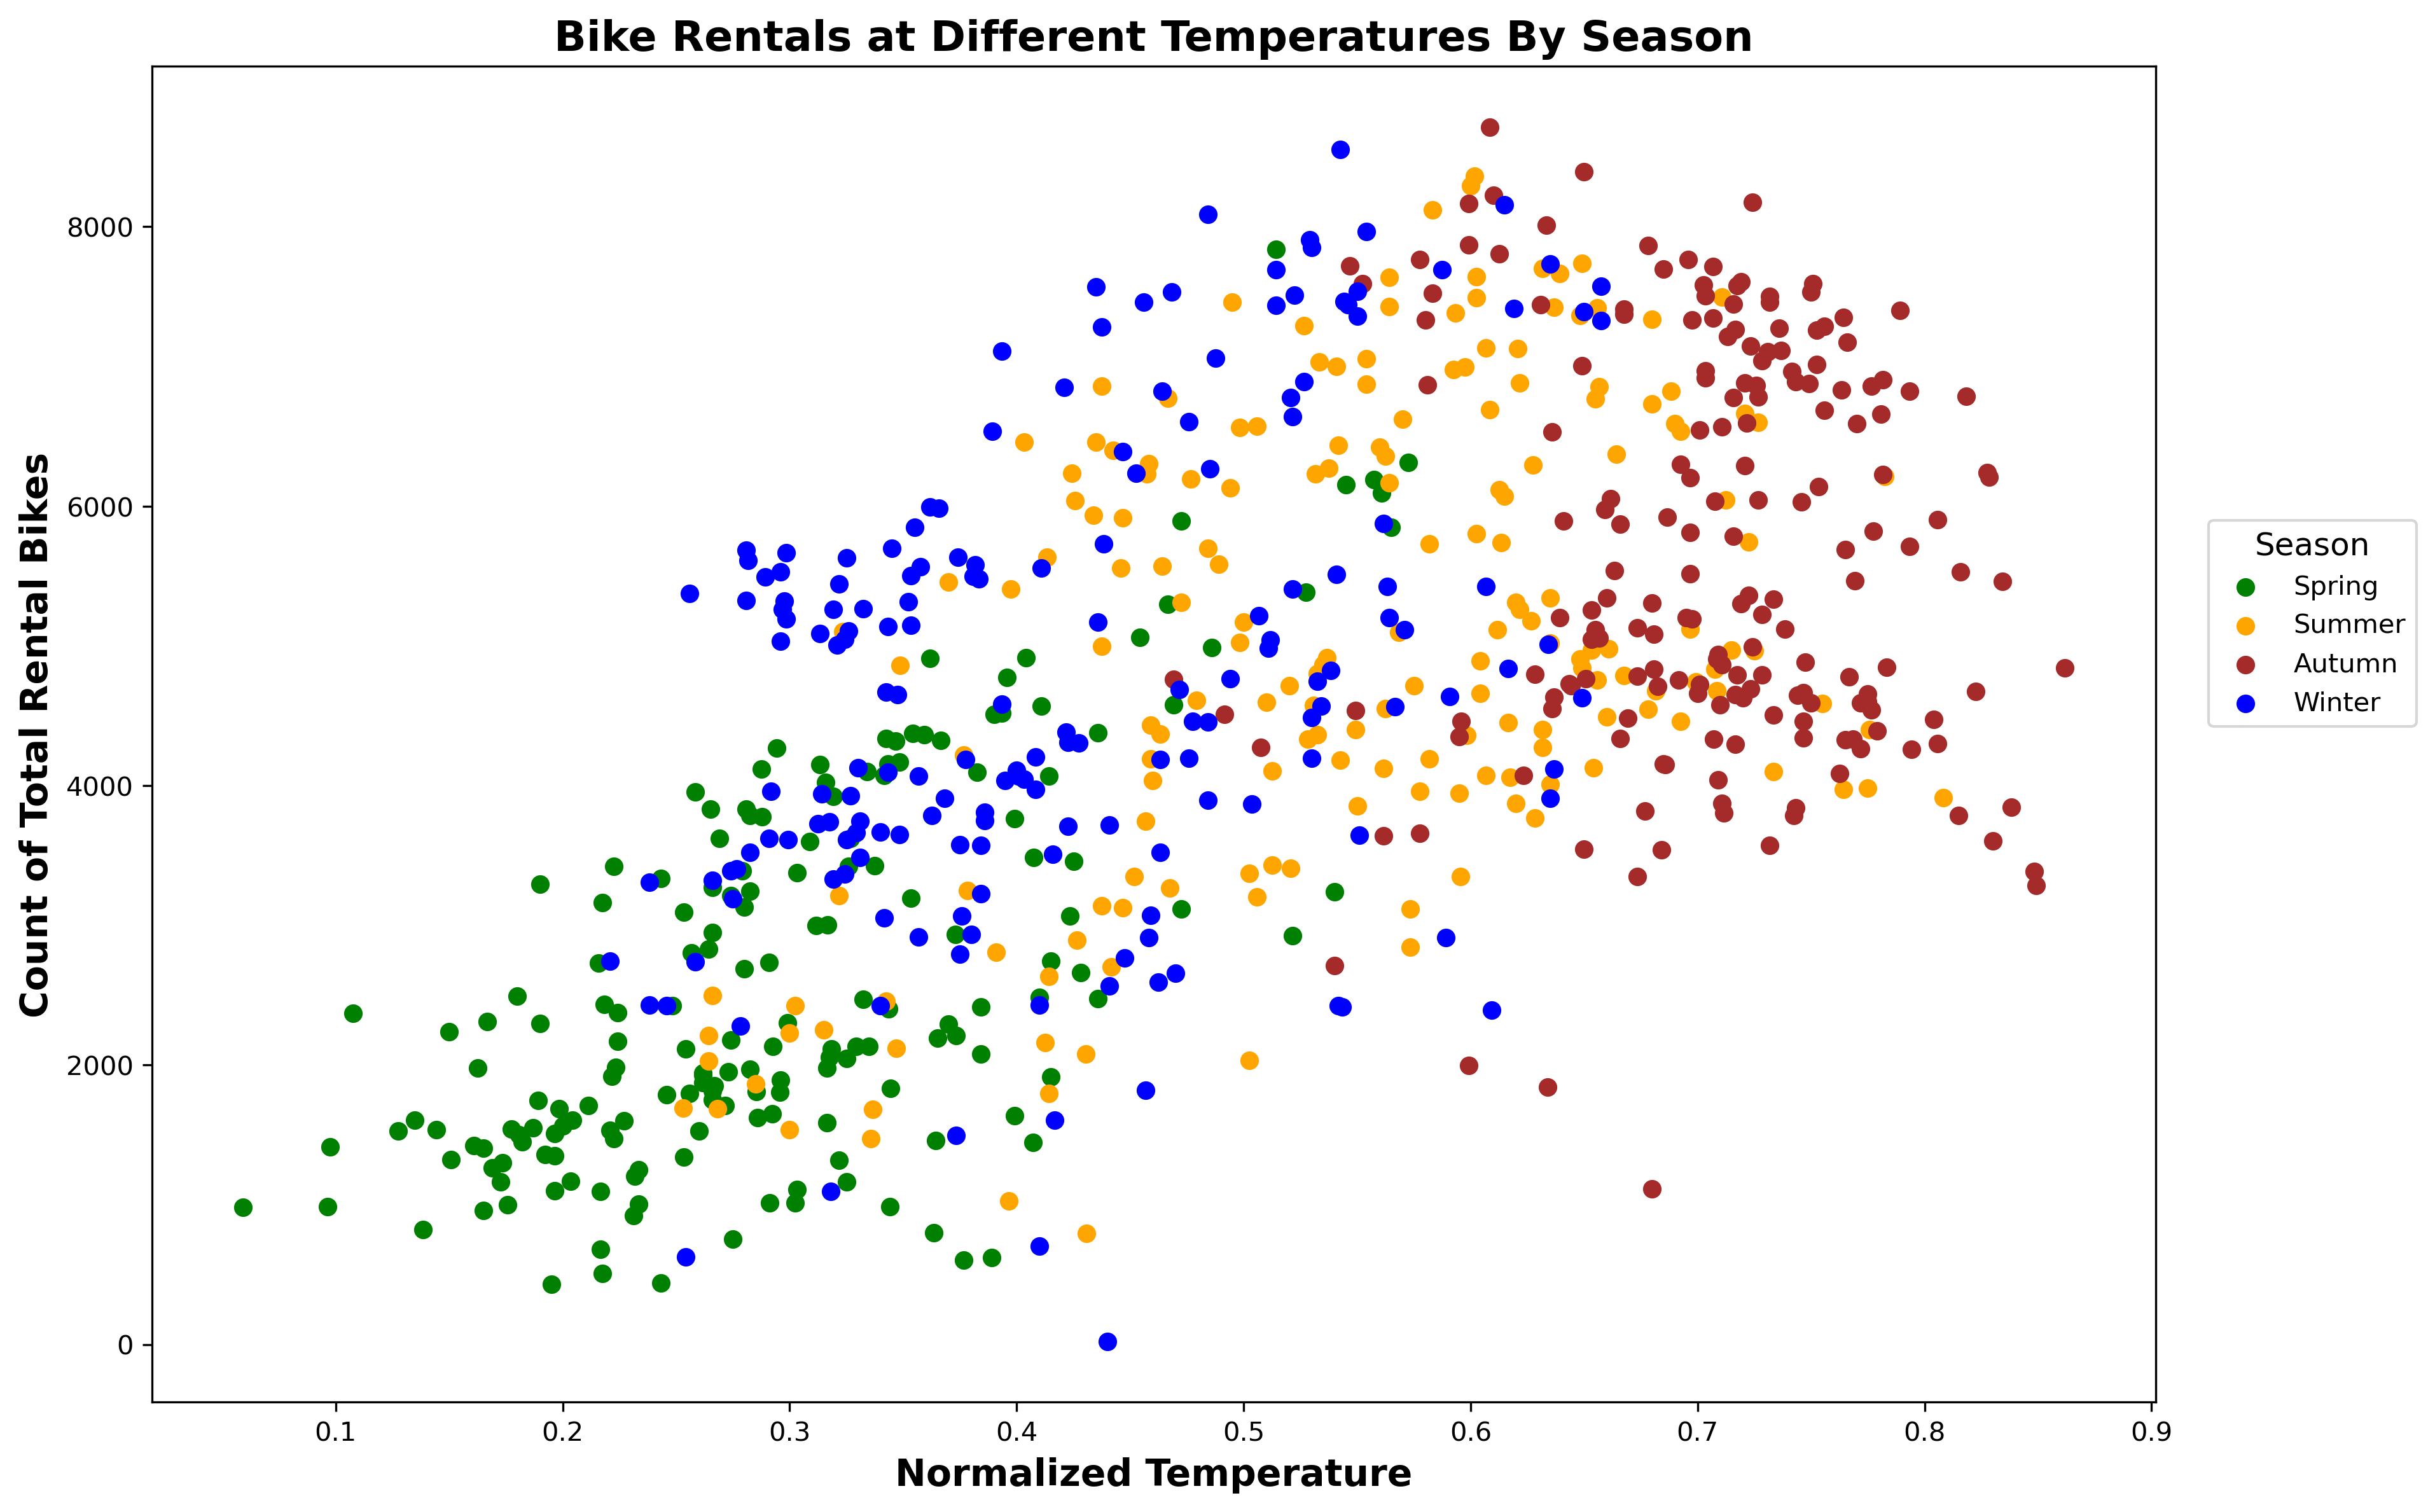

In [92]:
# Create a scatter plot which will compare the number of total bike rentals with the normalized temperatures
# Plot will show all instances, which will be differentiated by season (represented by colors)

fig = plt.figure(figsize=(15,10))

fontdict={'fontsize':16,'weight':'bold','color':'black',
          'horizontalalignment':'center'}

fontdictx={'fontsize':14,'weight':'bold','color':'black',
          'horizontalalignment':'center'}

fontdicty={'fontsize':14,'weight':'bold','color':'black',
          'horizontalalignment':'center'}

axes = fig.add_axes([0.1,0.1,0.7,0.7])

spring = axes.scatter('temp','cnt',data=bikes[bikes['season']==1],marker='o',color='green')
summer = axes.scatter('temp','cnt',data=bikes[bikes['season']==2],marker='o',color='orange')
autumn = axes.scatter('temp','cnt',data=bikes[bikes['season']==3],marker='o',color='brown')
winter = axes.scatter('temp','cnt',data=bikes[bikes['season']==4],marker='o',color='blue')

axes.legend(handles=(spring,summer,autumn,winter),labels=('Spring','Summer','Autumn','Winter'),title='Season'
           ,title_fontsize=12,bbox_to_anchor=(1,0.7),borderaxespad=2.)

axes.set_title('Bike Rentals at Different Temperatures By Season',fontdict = fontdict)
axes.set_xlabel('Normalized Temperature',fontdict = fontdictx)
axes.set_ylabel('Count of Total Rental Bikes', fontdict= fontdicty);